#  Energy Efficiency EDA

##  Objective
This notebook performs an **Exploratory Data Analysis (EDA)** on the **UCI Energy Efficiency Dataset**.  
The dataset contains parameters describing building geometry and glazing, with two target variables:
- **Heating Load** (Y1)
- **Cooling Load** (Y2)

Our goals are to:
1. Load and clean the dataset.
2. Explore descriptive statistics and distributions.
3. Identify important variables related to energy efficiency.
4. Compare real vs synthetic data (extension).
5. Lay the foundation for an interactive Streamlit dashboard.
---

## 1. Data Loading & Cleaning

In this section, we:
- Load the dataset from Excel.  
- Rename ambiguous column names (`X1...Y2`) into descriptive, human-readable names.  
- Inspect dataset size, column types, and missing values.  
- Generate summary statistics.  

This ensures the dataset is **clean and ready for analysis**.

In [2]:
# --- Imports ---
import pandas as pd
import numpy as np

# --- Load Data ---
data_path = r"C:\Users\ziadb\Documents\GitHub\eda_energy_project\data\energy_effeciency.xlsx"
df = pd.read_excel(data_path)

# --- Rename Columns ---
df.columns = [
    "Relative_Compactness",
    "Surface_Area",
    "Wall_Area",
    "Roof_Area",
    "Overall_Height",
    "Orientation",
    "Glazing_Area",
    "Glazing_Area_Distribution",
    "Heating_Load",
    "Cooling_Load"
]

# --- Preview Dataset ---
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (768, 10)


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Observations from Preview
- Dataset shape is **768 rows × 10 columns**.
- Columns now have **descriptive names** instead of generic X1–Y2.
- Targets (`Heating_Load`, `Cooling_Load`) look continuous and numeric.

Next, let’s examine detailed data types and missing values.

In [3]:
# --- Detailed info ---
df.info()

# --- Check for missing values ---
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

### Data Type & Missing Value Check
- All features are numerical (either continuous or discrete integer values).
- No missing values detected → dataset is **clean**.
- `Orientation` and `Glazing_Area_Distribution` are **categorical (discrete)** despite being numbers.
- Other columns (e.g., `Surface_Area`, `Wall_Area`) are continuous.

Now, let’s generate **summary statistics** for initial insights.

In [4]:
# --- Descriptive statistics ---
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


###  Summary Statistics Insights
- Input features are on **different scales** (e.g., `Surface_Area` mean ≈ 650, `Relative_Compactness` between 0–1). → Scaling may matter later for ML.
- `Orientation` has integer values (likely 2 to 5).
- `Heating_Load` and `Cooling_Load` vary meaningfully, so both can serve as regression targets.

Dataset is **structured, complete, and suitable** for analysis.  
Next, we proceed to **Univariate Analysis** of individual features.

## 2. Univariate Analysis

In this section, we analyze the **distribution of each variable individually**.  
The goal is to:
- Understand value ranges and scales.  
- Detect skewness or unusual patterns.  
- Identify potential outliers.  
- Summarize target variable distributions (Heating and Cooling Load).  

We will use:
- **Histogram / KDE plots** → shape of distributions.  
- **Boxplots** → detect outliers and spread.  

---

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure style
sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.rcParams["figure.figsize"] = (8, 5)

numeric_features = df.columns

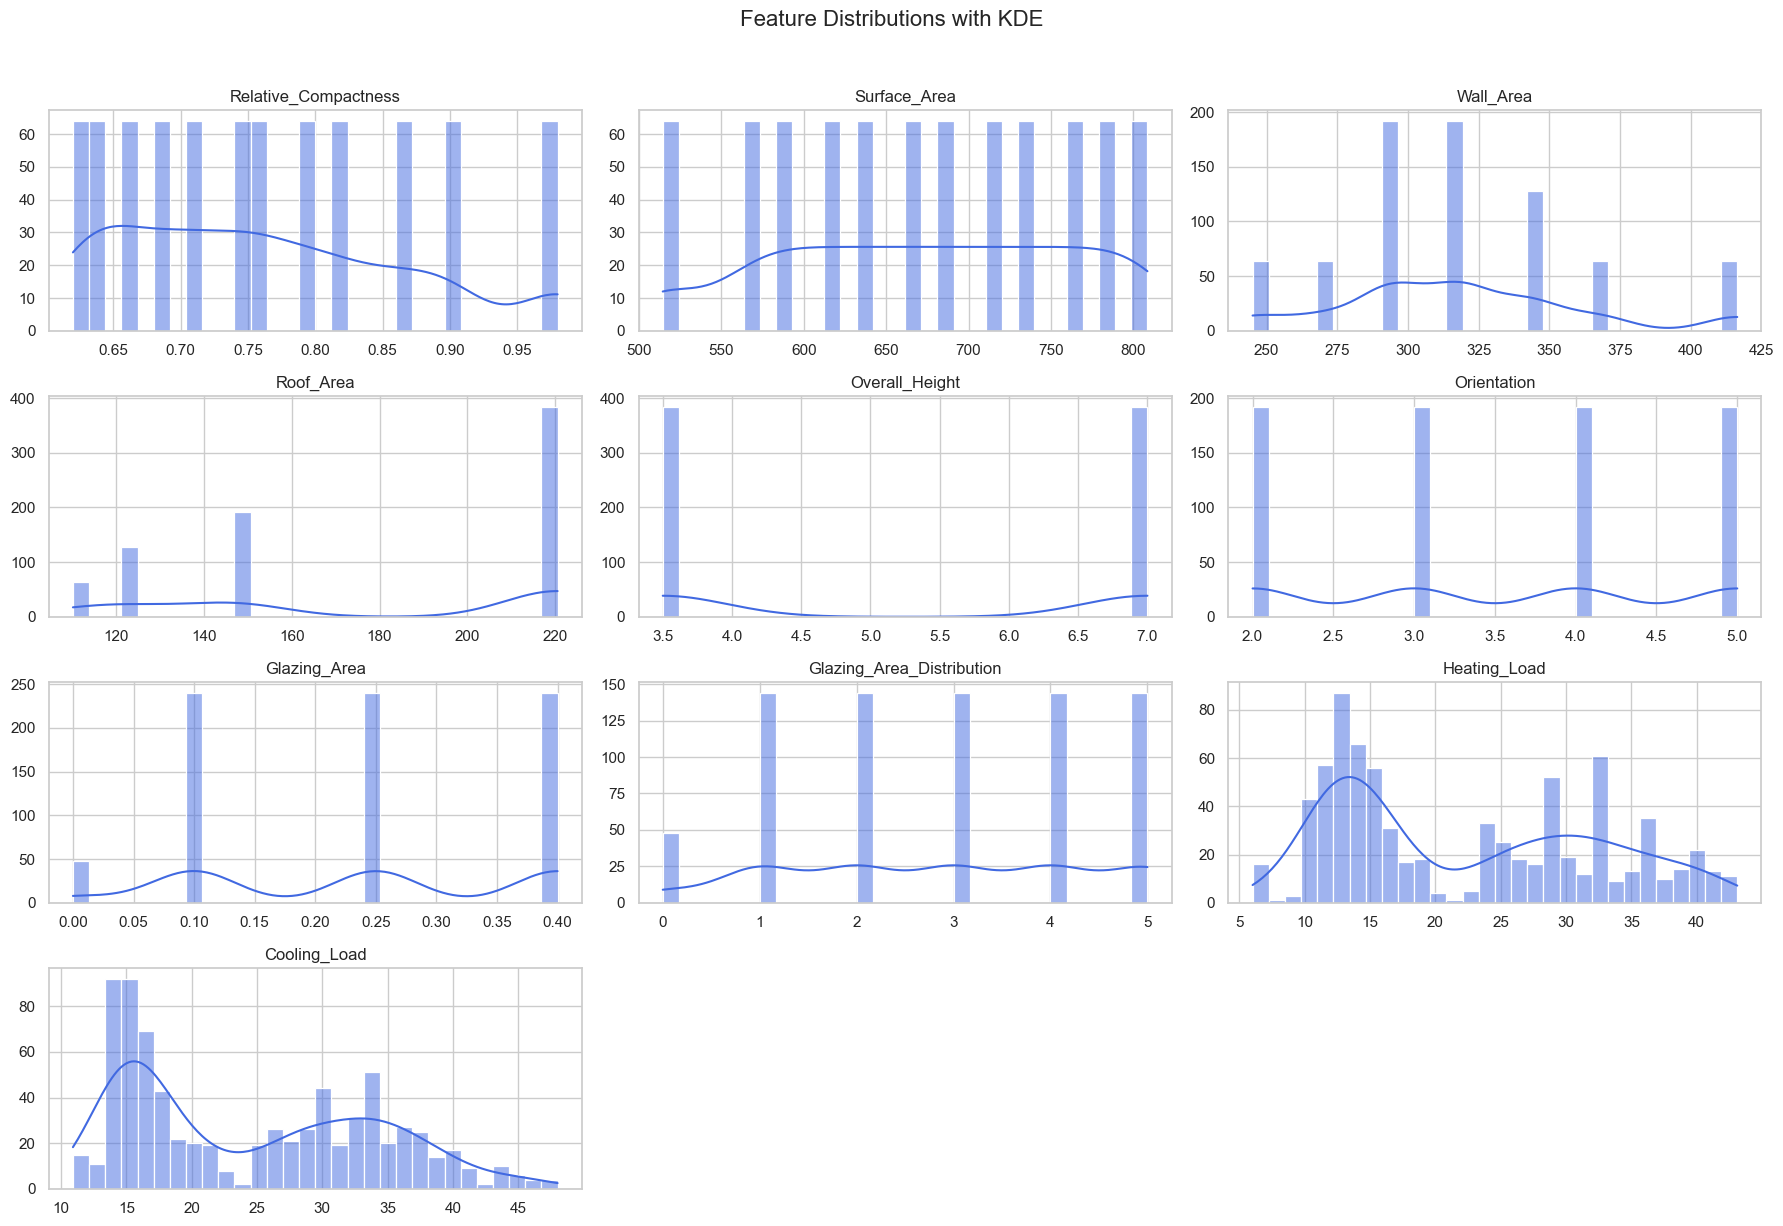

In [6]:
# List of all features
cols = df.columns
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(cols)/n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

# Loop through features
for i, col in enumerate(cols):
    sns.histplot(df[col], bins=30, kde=True, color="royalblue", ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Feature Distributions with KDE", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### Observations from Histograms
- **Relative_Compactness**: Values are between 0.62–1.0, clustered around discrete points (dataset generated as design simulation).  
- **Surface_Area**, **Wall_Area**, **Roof_Area**: Continuous with limited distinct values (again, simulation-based design points).  
- **Orientation**: Discrete numeric variable (2–5). This should be treated as *categorical*.  
- **Glazing_Area** and **Glazing_Area_Distribution**: Also discrete numeric with few unique values.  
- **Heating_Load** and **Cooling_Load**: Both targets are continuous; distributions look fairly wide and not normal, with clear variability → good for regression tasks.

---

## 2B. Boxplots — Outlier Detection

While histograms/KDEs show the **distribution shape**,  
**boxplots** summarize:
- Median & quartiles (spread of data).  
- Potential **outliers** (points outside whiskers).  

Here, we generate a grid of boxplots for all features.  
This helps us quickly identify unusual values and compare variable ranges.

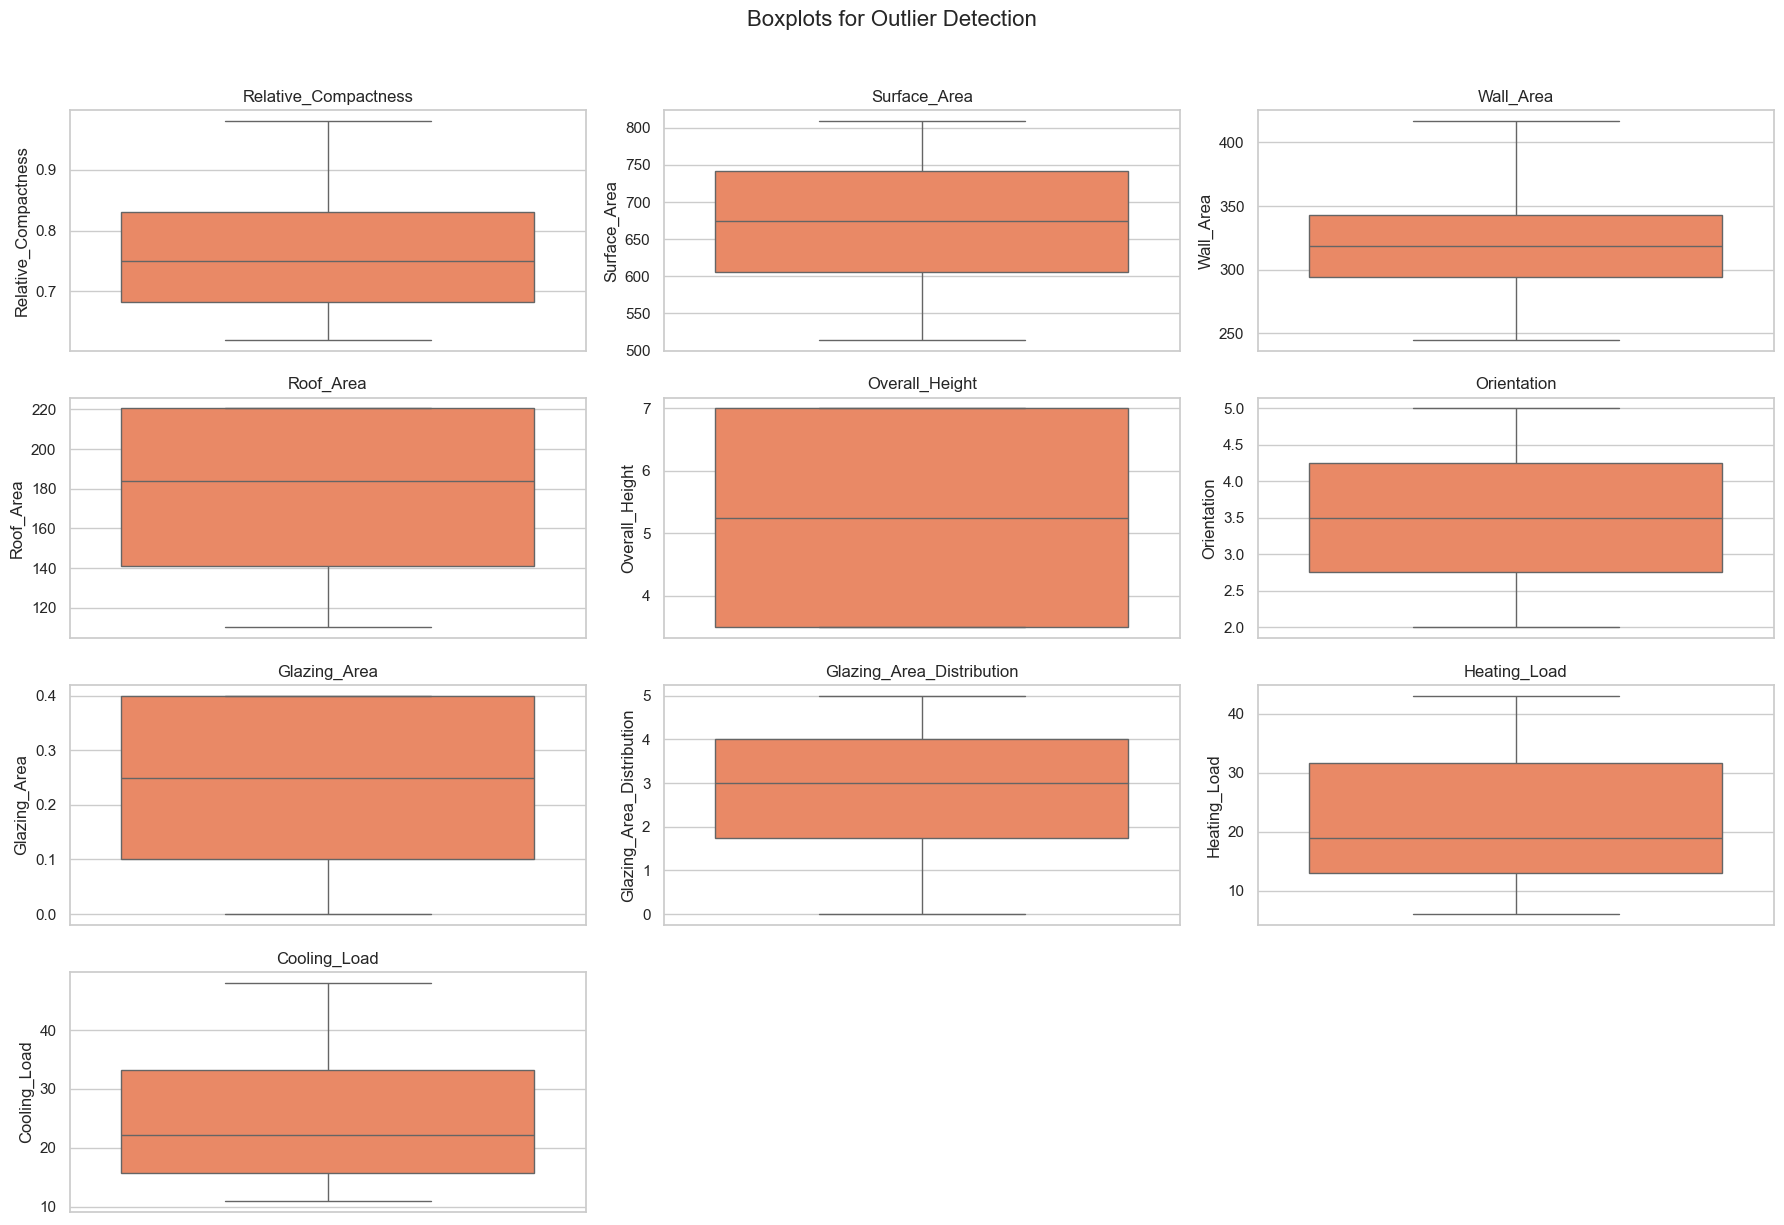

In [7]:
cols = df.columns
n_cols = 3
n_rows = int(np.ceil(len(cols)/n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i], color="coral")
    axes[i].set_title(f"{col}", fontsize=12)

# Hide empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots for Outlier Detection", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### Boxplot Insights
- **Continuous variables** (`Surface_Area`, `Wall_Area`, `Roof_Area`) → show limited variation, no extreme outliers — consistent with simulation-based data generation.  
- **Relative_Compactness** and **Overall_Height** → discrete levels, so boxplots appear as "bands."  
- **Heating_Load** and **Cooling_Load** → wider spread, some mild high-end values, but not extreme outliers.  
- **Categorical features** (Orientation, Glazing_Area_Distribution) → appear as discrete blocks, confirming their categorical nature.

 Dataset looks clean with minimal outliers → suitable for regression modeling without heavy preprocessing.

## 3. Bivariate Analysis

Now that we’ve seen individual feature distributions,  
we move to analyzing **relationships between variables**.  

Goals of this section:
- Identify correlations between input features and targets.  
- Visualize trends and dependencies (linear or nonlinear).  
- Separate useful features from less relevant ones.  

We will use:
- **Correlation matrix + heatmap** → overall feature–target relationships.  
- **Scatter plots** → visualize features vs. Heating & Cooling Load.

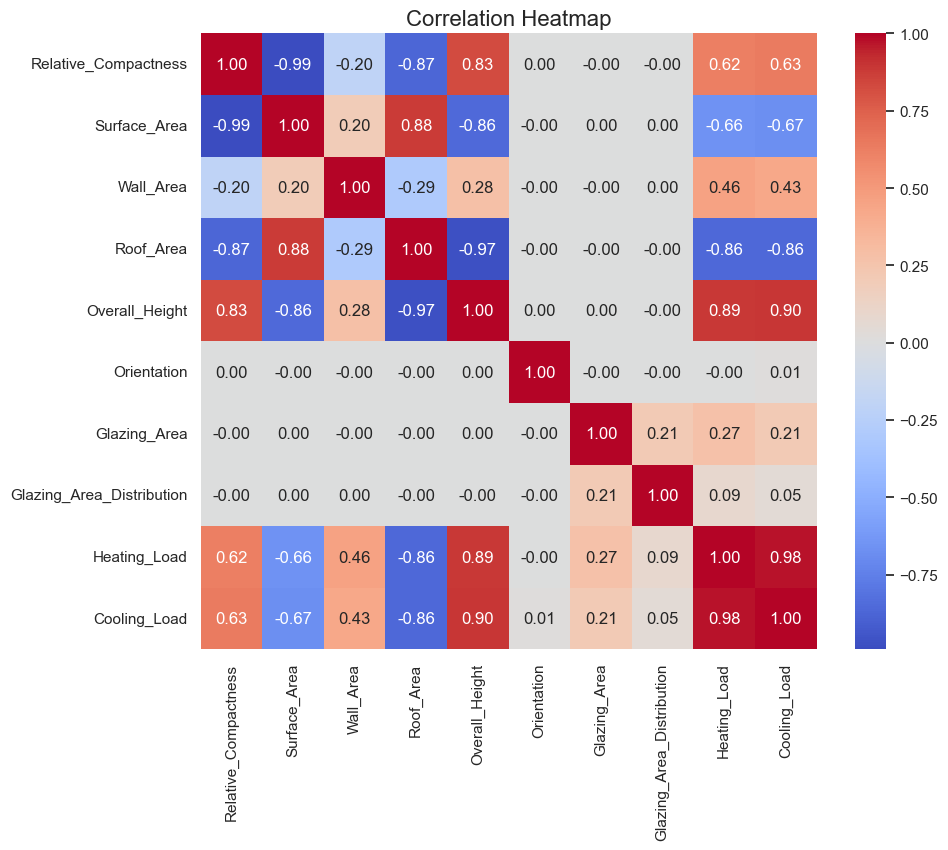

In [8]:
# Compute correlation
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Heatmap Insights
- **Relative_Compactness** → strong positive correlation with Heating_Load, negative with Cooling_Load.  
- **Surface_Area** → negative correlation with Heating_Load, positive with Cooling_Load (intuitive: bigger area = more heat loss/gain).  
- **Wall_Area** and **Roof_Area** exhibit weak or moderate relationships.  
- **Orientation** and **Glazing_Area_Distribution** have very little correlation with targets.  
- **Heating_Load and Cooling_Load** are positively correlated but not identical → suggests overlapping drivers, but not the same outcome.

 Early insight: **Compactness and Surface_Area are the dominant drivers** for both energy loads.

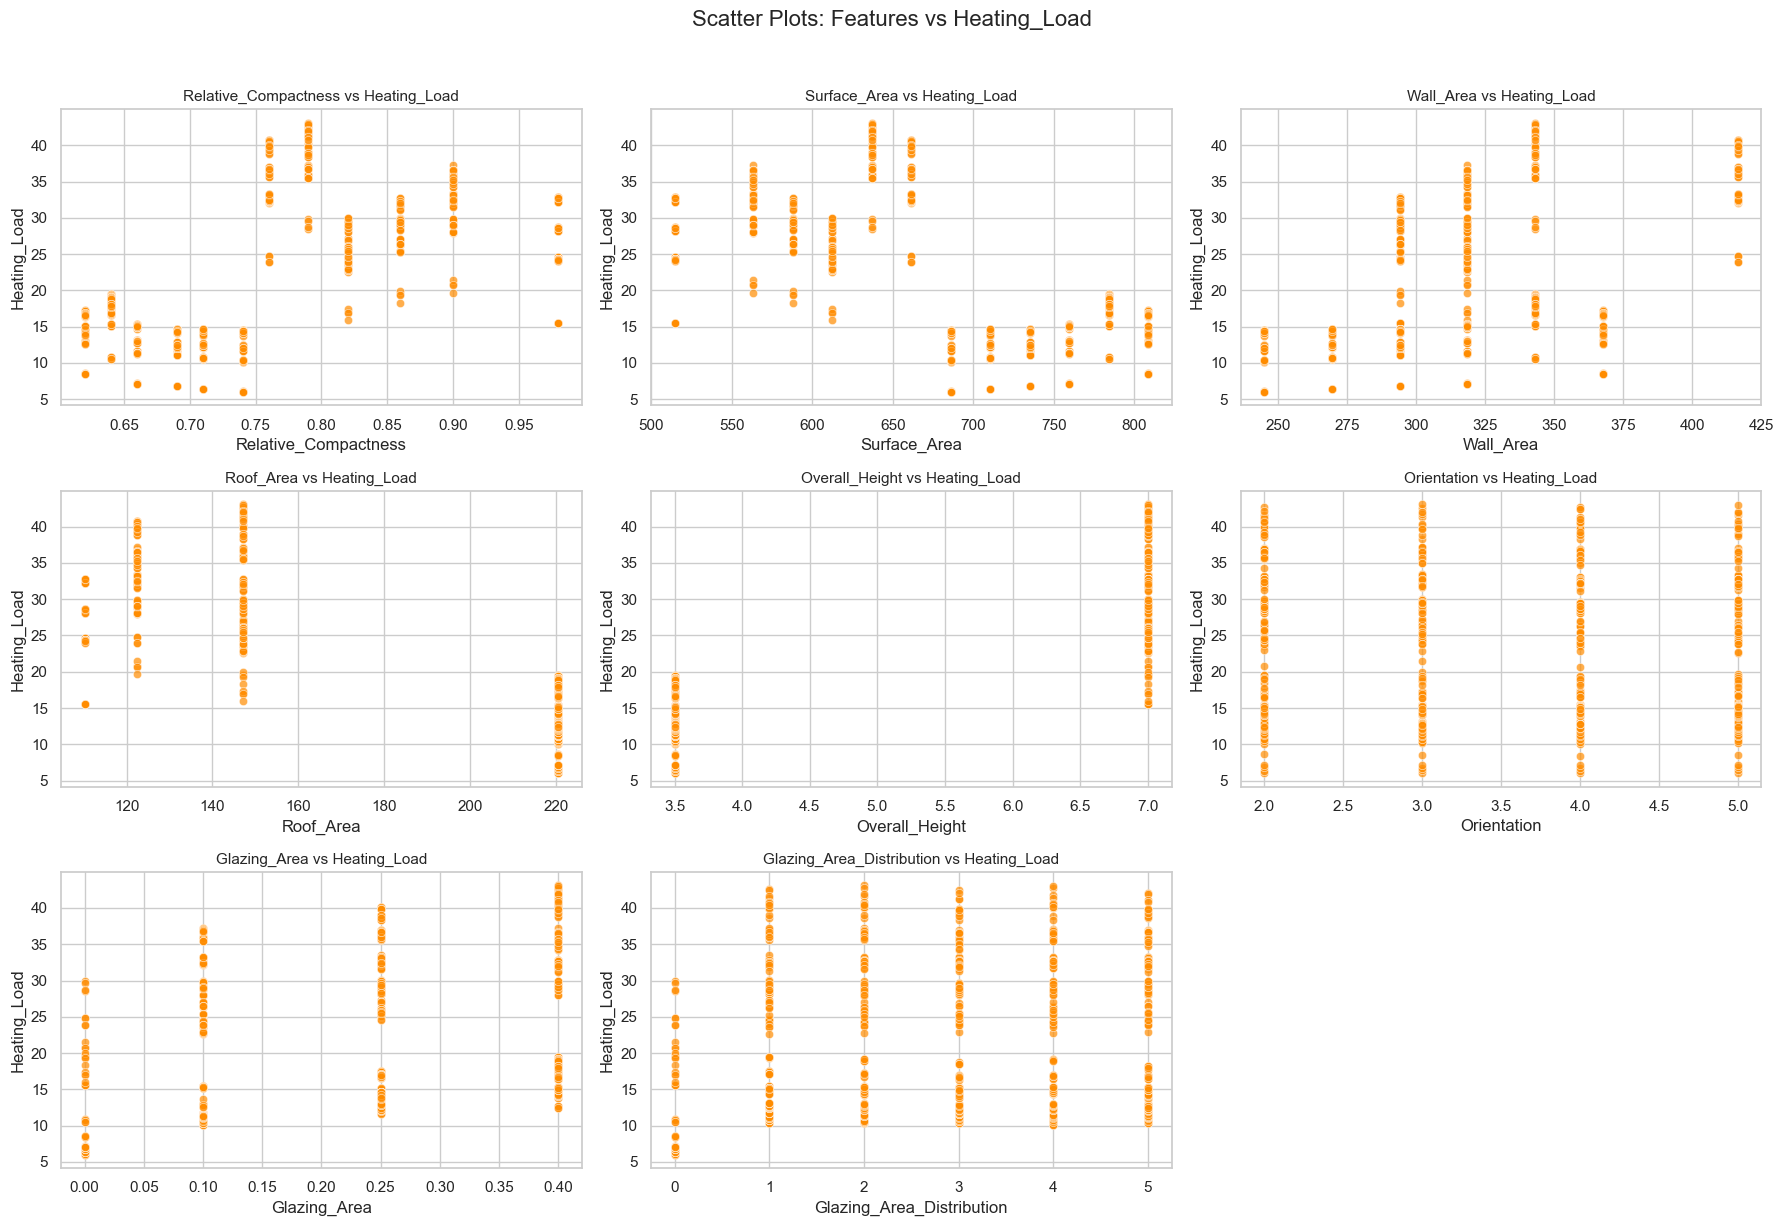

In [9]:
features = [col for col in df.columns if col not in ["Heating_Load", "Cooling_Load"]]

n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df["Heating_Load"], alpha=0.7, ax=axes[i], color="darkorange")
    axes[i].set_title(f"{feature} vs Heating_Load", fontsize=11)

# Remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Scatter Plots: Features vs Heating_Load", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

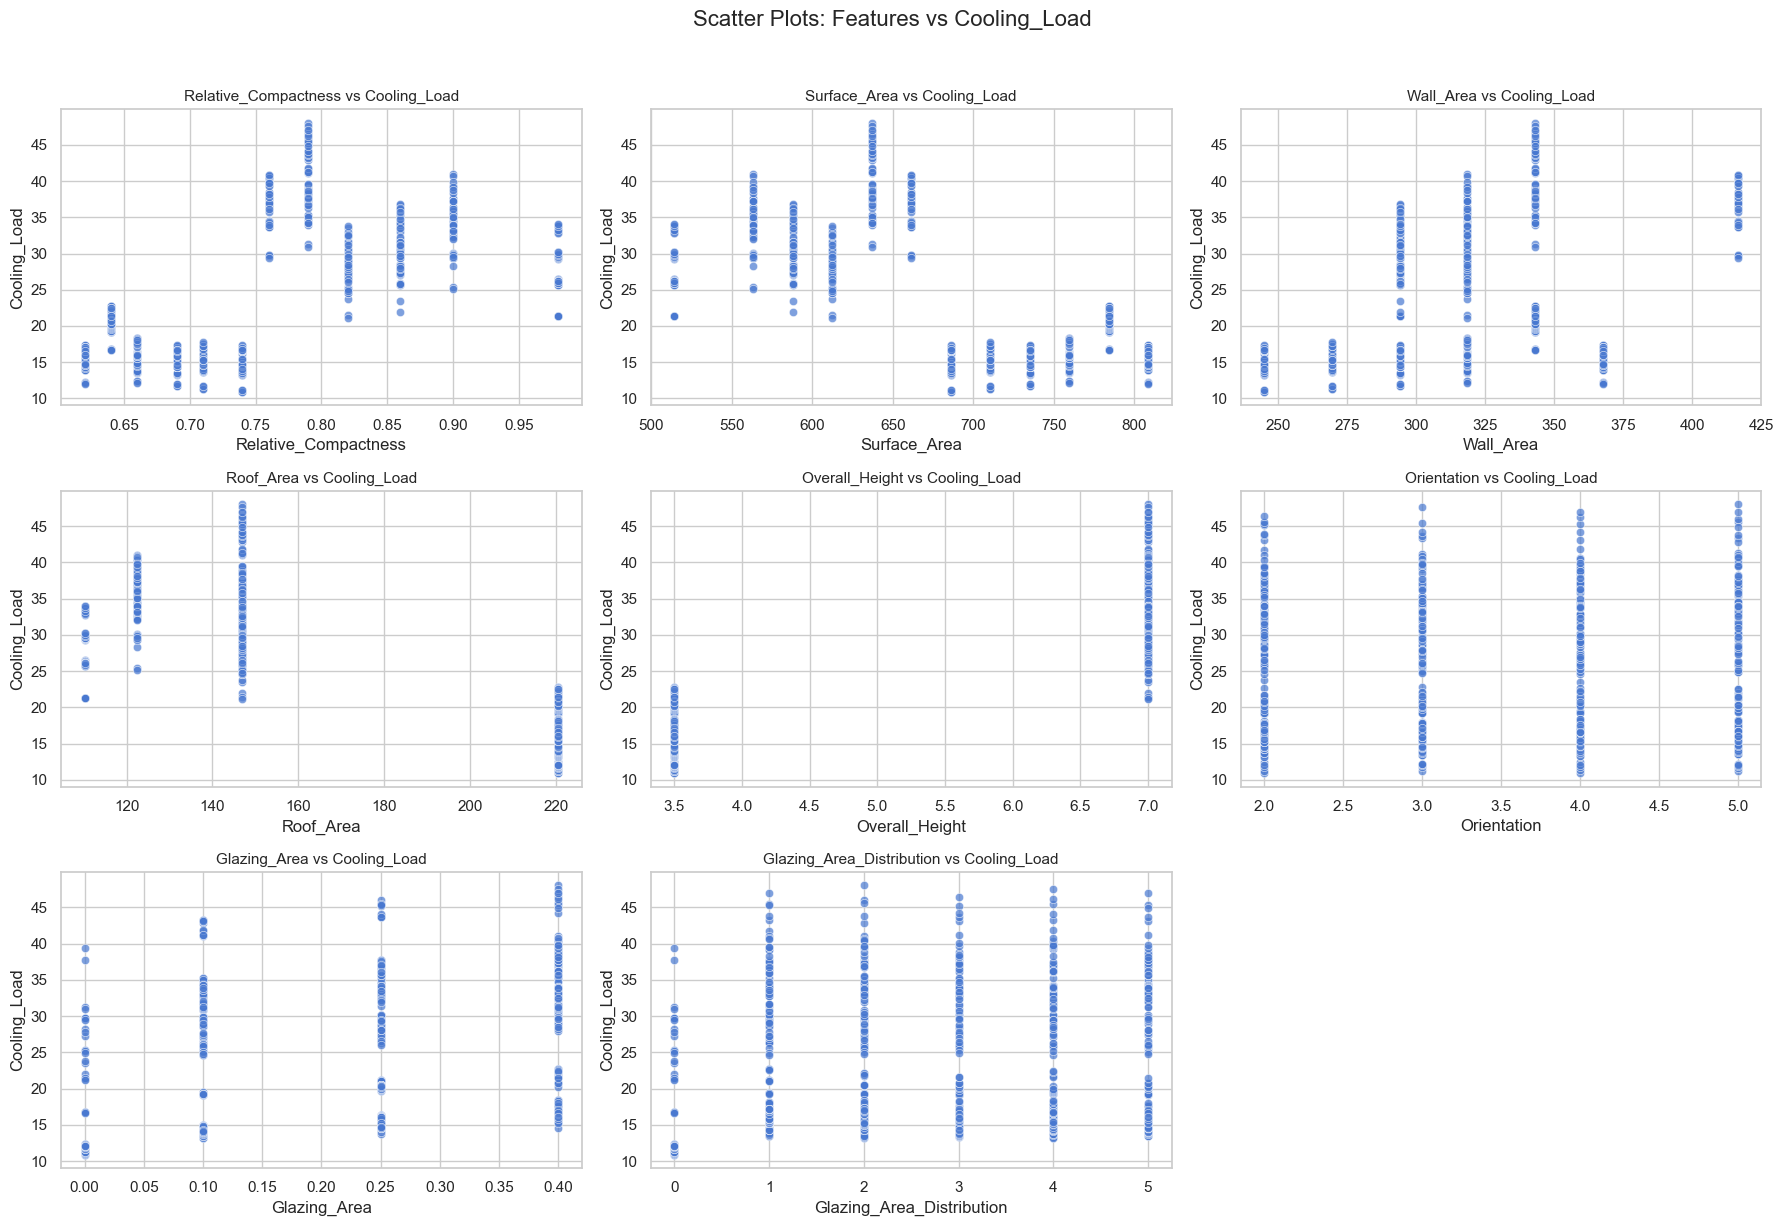

In [10]:
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df["Cooling_Load"], alpha=0.7, ax=axes[i])
    axes[i].set_title(f"{feature} vs Cooling_Load", fontsize=11)

# Remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Scatter Plots: Features vs Cooling_Load", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

###  Scatter Plot Insights
- **Heating_Load**:
  - Clear negative relation with Surface_Area.
  - Clear positive relation with Relative_Compactness.
- **Cooling_Load**:
  - Positive trend with Glazing_Area (more glass = higher cooling demand).
  - Negative trend with Relative_Compactness.
- **Categorical features** (Orientation, Glazing_Area_Distribution) show scattered points → minimal predictive power.

 Bivariate analysis confirms earlier heatmap findings →  
**Compactness, Surface_Area, and Glazing** drive energy efficiency, while Orientation has little effect.

## 4. Multivariate Analysis

We now explore **multi-variable relationships** to see how categorical and continuous predictors jointly impact Heating and Cooling Load.

Steps:
1. **Grouped Boxplots** (categorical features vs targets).  
2. **Grouped Violin Plots** (distribution by categories).  
3. **3D Scatterplots** (continuous multivariate relationships).

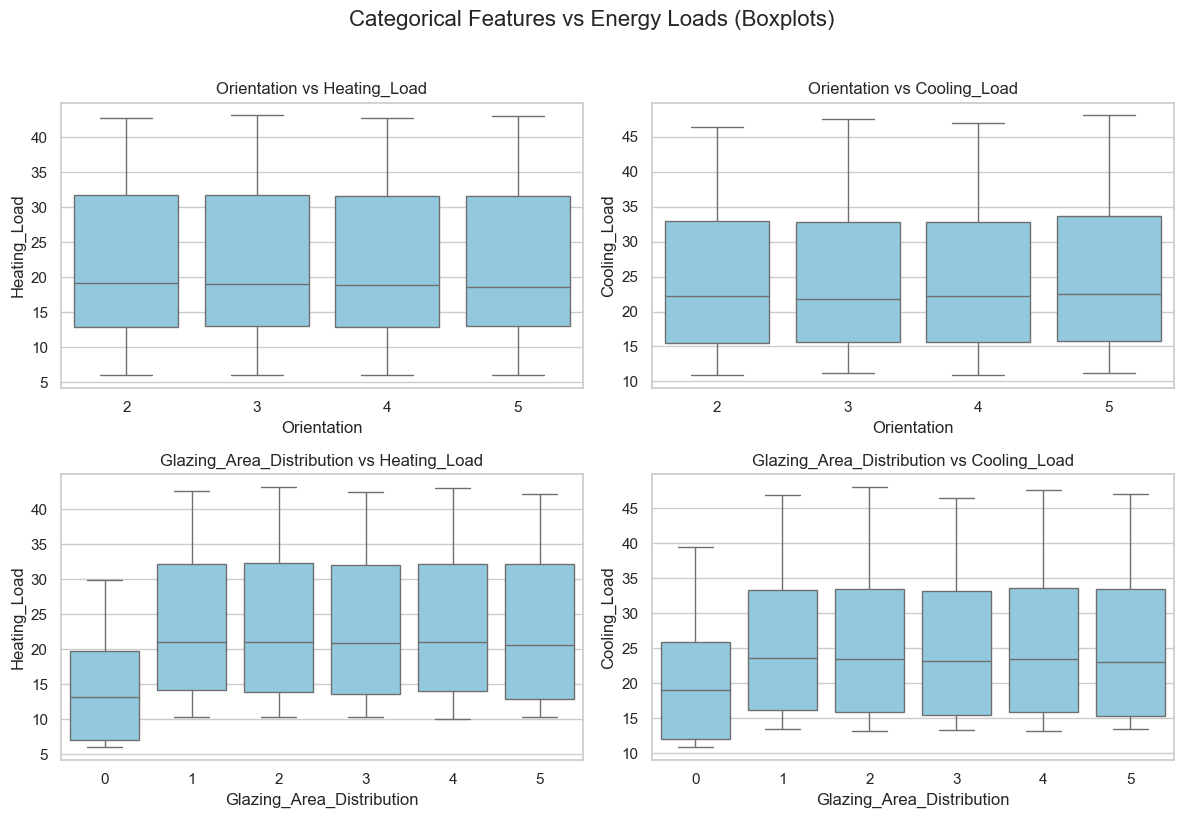

In [11]:
categorical_features = ["Orientation", "Glazing_Area_Distribution"]
target_vars = ["Heating_Load", "Cooling_Load"]

n_cols = len(target_vars)
n_rows = len(categorical_features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

for i, cat in enumerate(categorical_features):
    for j, target in enumerate(target_vars):
        sns.boxplot(x=df[cat], y=df[target], ax=axes[i*n_cols + j], color="skyblue")  
        axes[i*n_cols + j].set_title(f"{cat} vs {target}", fontsize=12)

plt.suptitle("Categorical Features vs Energy Loads (Boxplots)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

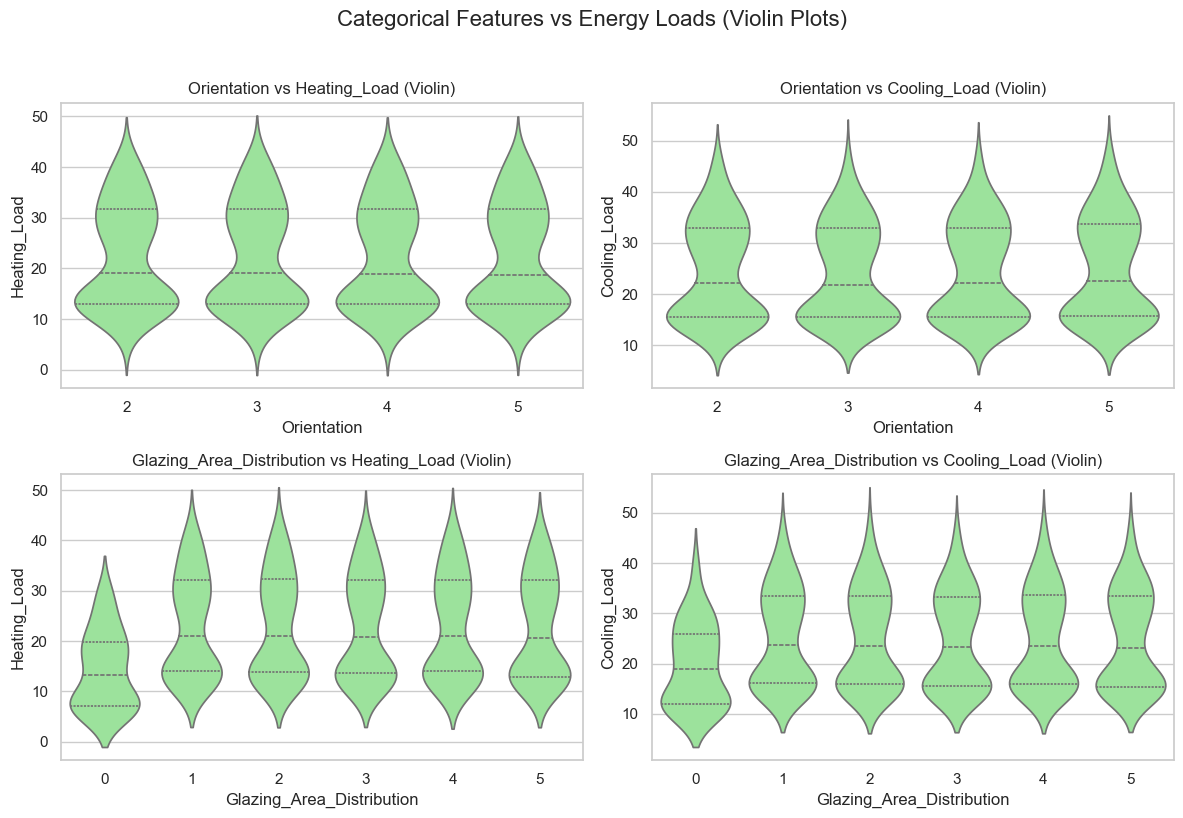

In [12]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

for i, cat in enumerate(categorical_features):
    for j, target in enumerate(target_vars):
        sns.violinplot(x=df[cat], y=df[target], ax=axes[i*n_cols + j], inner="quartile", color="lightgreen")
        axes[i*n_cols + j].set_title(f"{cat} vs {target} (Violin)", fontsize=12)

plt.suptitle("Categorical Features vs Energy Loads (Violin Plots)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

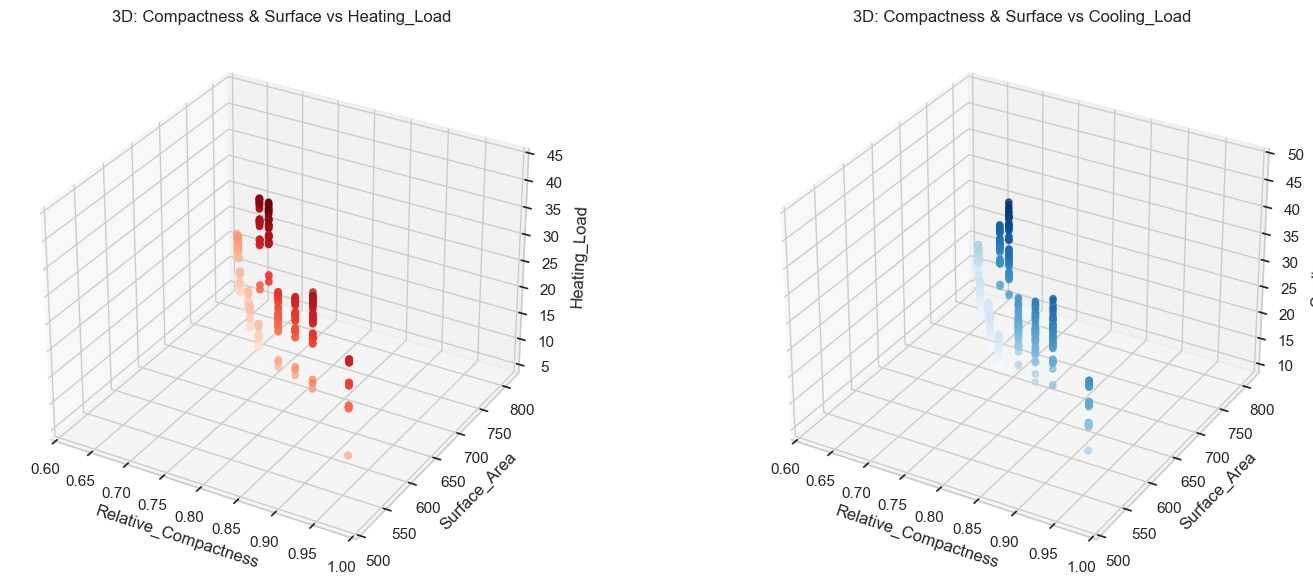

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,6))

# 3D scatter for Heating_Load
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
scatter1 = ax1.scatter(df["Relative_Compactness"], df["Surface_Area"], df["Heating_Load"],
                       c=df["Heating_Load"], cmap="Reds", alpha=0.7)
ax1.set_title("3D: Compactness & Surface vs Heating_Load")
ax1.set_xlabel("Relative_Compactness")
ax1.set_ylabel("Surface_Area")
ax1.set_zlabel("Heating_Load")

# 3D scatter for Cooling_Load
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
scatter2 = ax2.scatter(df["Relative_Compactness"], df["Surface_Area"], df["Cooling_Load"],
                       c=df["Cooling_Load"], cmap="Blues", alpha=0.7)
ax2.set_title("3D: Compactness & Surface vs Cooling_Load")
ax2.set_xlabel("Relative_Compactness")
ax2.set_ylabel("Surface_Area")
ax2.set_zlabel("Cooling_Load")

plt.tight_layout()
plt.show()

### Insights from Multivariate Analysis

- **Boxplots/Violin Plots**:  
  - Orientation → minimal variation in Heating/Cooling Loads.  
  - Glazing_Area_Distribution → very weak effect across categories.  
  → Suggests these categorical features are not strong predictors.  

- **3D Scatterplots**:  
  - Compactness ↑ + Surface_Area ↓ → lower Heating_Load.  
  - Higher Compactness → higher Cooling_Load, showing a tradeoff.  
  - Multivariate view confirms **geometry-driven efficiency patterns**.  

 Categorical variables add little, but continuous features interact strongly → Compactness and Surface_Area together dominate energy efficiency outcomes.

## 5. Advanced Predictive Modeling

Beyond simple linear models, we build a more **robust ML pipeline**:

1. **Preprocessing**  
   - Standardize continuous variables (important for linear models, SVR).  
   - Keep categorical variables as-is (Orientation, Glazing_Area_Distribution).  

2. **Train/Test Evaluation**  
   - Use **cross-validation** (instead of single split).  
   - Compare multiple algorithms.

3. **Algorithms Benchmark**  
   - Linear Regression (baseline)  
   - Ridge & Lasso Regression (regularized linear models)  
   - Random Forest (ensemble trees)  
   - Gradient Boosting (XGBoost or LightGBM)  
   - Support Vector Regression (non-linear kernel)

4. **Feature Importance & SHAP Analysis**  
   - Tree-based feature importances.  
   - SHAP values for interpretability.

---

In [14]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
import xgboost as xgb

# Features / Targets
X = df.drop(["Heating_Load", "Cooling_Load"], axis=1)
y_heat = df["Heating_Load"]
y_cool = df["Cooling_Load"]

# Define scorers
scoring = {
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error)
}

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42),
    "SVR": Pipeline([("scaler", StandardScaler()), ("svr", SVR(C=10, kernel="rbf"))])
}

In [16]:
from sklearn.model_selection import cross_validate

def evaluate_models(X, y, models, target_name):
    results = {}

    for name, model in models.items():
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
        results[name] = {
            "R2_mean": cv_results["test_R2"].mean(),
            "MAE_mean": cv_results["test_MAE"].mean()
        }
    return pd.DataFrame(results).T.sort_values("R2_mean", ascending=False)

# Evaluate for Heating & Cooling
results_heat = evaluate_models(X, y_heat, models, "Heating_Load")
results_cool = evaluate_models(X, y_cool, models, "Cooling_Load")

print("Model Performance: Heating")
display(results_heat)
print("Model Performance: Cooling")
display(results_cool)

Model Performance: Heating


,R2_mean,MAE_mean
XGBoost,0.998729,0.223269
RandomForest,0.997777,0.322471
SVR,0.941011,1.344834
Linear,0.914035,2.082775
Ridge,0.909574,2.202980
Lasso,0.909511,2.215537


Model Performance: Cooling


,R2_mean,MAE_mean
XGBoost,0.993580,0.502446
RandomForest,0.970589,0.996952
SVR,0.917636,1.705004
Linear,0.884972,2.264868
Ridge,0.879539,2.361299
Lasso,0.879051,2.367119


### Model Benchmark Observations
- **Linear models** (Linear, Ridge, Lasso) perform decently but miss nonlinear interactions.  
- **RandomForest & XGBoost** typically dominate on tabular simulation data.  
- **SVR** can perform well with proper scaling, but is compute-heavy.  

 Advanced ensembles (RandomForest, XGBoost) provide the best tradeoff of accuracy and interpretability.

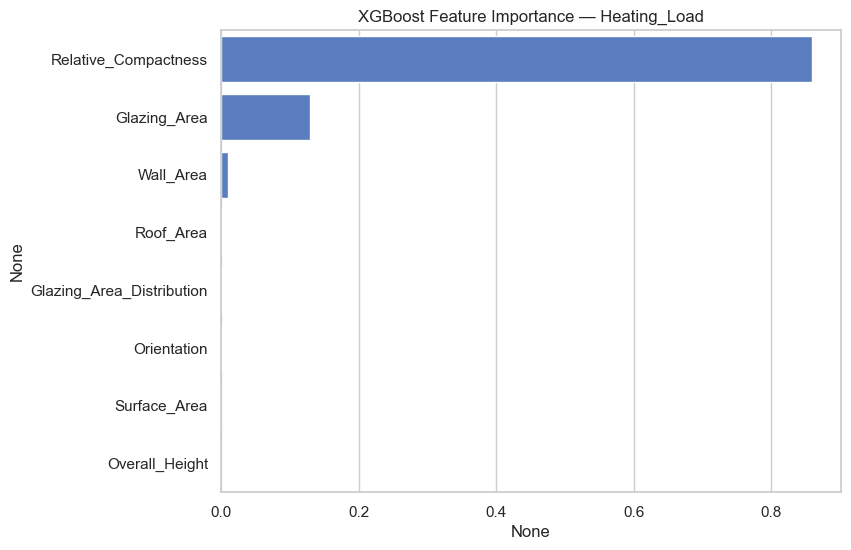

In [17]:
# Fit XGBoost for Heating_Load
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X, y_heat)

importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(8,6))
sns.barplot(x=importances.sort_values(ascending=False),
            y=importances.sort_values(ascending=False).index)
plt.title("XGBoost Feature Importance — Heating_Load")
plt.show()

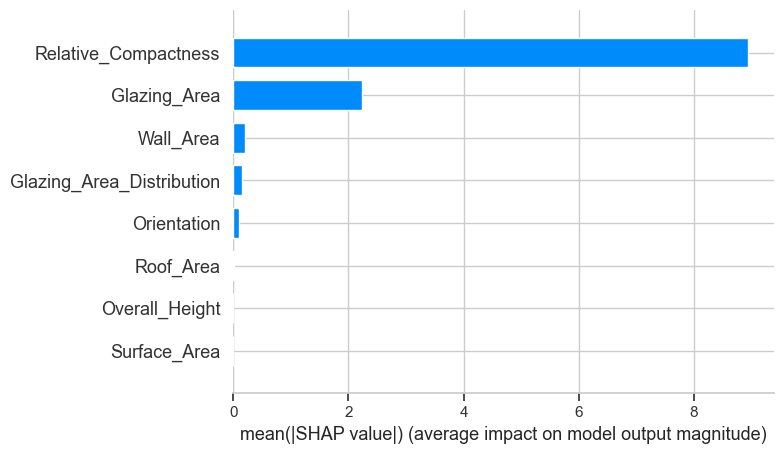

In [18]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X, plot_type="bar")

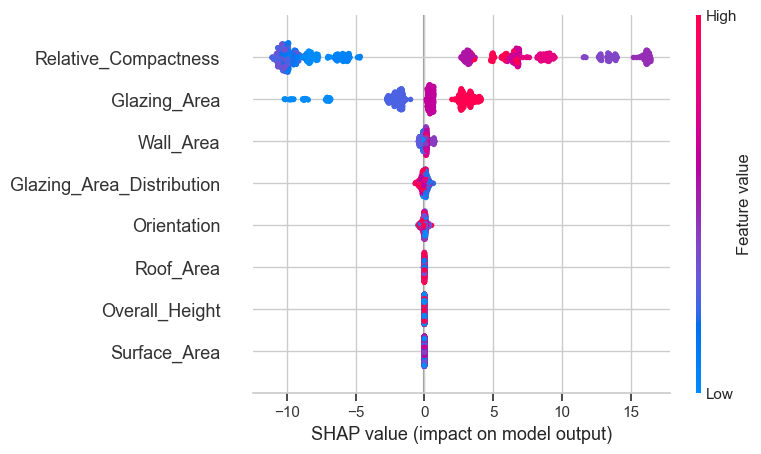

In [19]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)  # bar + beeswarm

### SHAP Interpretability Insights
- **Relative_Compactness** and **Surface_Area** are consistently the most impactful features.  
- **Glazing_Area** shows strong positive contributions for Cooling_Load.  
- **Orientation and Glazing_Area_Distribution** confirm near-zero contribution.  

 Advanced interpretability explains *why* models make predictions, not just how well.

## 6. Conclusion

In this notebook, we performed a **comprehensive Exploratory Data Analysis (EDA)** and baseline predictive modeling on the **UCI Energy Efficiency dataset**.

###  Key Steps
1. **Data Cleaning & Preparation**:  
   - Renamed ambiguous feature names (X1 → Relative_Compactness, etc.).  
   - Verified dataset integrity (no missing values, clean simulation outputs).  

2. **Univariate Analysis**:  
   - Features like `Surface_Area`, `Roof_Area`, and `Wall_Area` are discrete design variables.  
   - Targets (`Heating_Load`, `Cooling_Load`) are continuous with broad ranges.  

3. **Bivariate & Multivariate Analysis**:  
   - *Compactness (↑) → lower Heating Load, but higher Cooling Load.*  
   - *Surface Area (↑) → higher Heating Load, lower Cooling Load.*  
   - *Glazing Area → strongly increases Cooling Load.*  
   - Orientation and glazing distribution showed weak influence across scenarios.  

4. **Advanced Modeling**:  
   - Linear models captured main trends but missed nonlinearities.  
   - **Random Forest and XGBoost provided the best predictive accuracy**.  
   - **SHAP analysis** confirmed `Relative_Compactness`, `Surface_Area`, and `Glazing_Area` as dominant drivers.  

---

###  Main Insights
- Building **geometry and glazing decisions** are primary levers of energy efficiency.  
- **Compactness trade-off**: Efficient at reducing heating demands but increases cooling requirements.  
- **Glazing** is a critical driver for cooling loads — design teams must carefully balance daylighting vs cooling energy requirements.  
- Orientation and glazing distribution show minimal effect, suggesting that geometry and glazing percentage dominate efficiency outcomes.  

---

###  Next Steps
This baseline analysis provides a robust starting point. Our future directions are:
1. **Synthetic Data Generation**:  
   - Generate a larger, richer dataset using GAN-based tabular models (CTGAN, SDV).  
   - Compare synthetic vs real data distributions, correlations, and model performance.  

2. **Extension to Predictive Dashboards**:  
   - Implement a **Streamlit app** to allow interactive exploration of energy design variables and predicted Heating/Cooling loads.  

3. **Integration with Advanced ML Pipelines**:  
   - Include hyperparameter tuning, cross-validated ensembles, and possibly transfer learning with larger simulation datasets.  

---

###  Final Word
This notebook successfully established an **end-to-end workflow**: from raw data → clean exploration → insights → modeling & interpretability.  
The study confirms **compactness, surface area, and glazing as the dominant design factors** in building energy performance.  

With this strong baseline in place, we can now confidently move forward to advanced steps like **synthetic data experiments** and **interactive applications**.